In [5]:
from ipywidgets import interact
import ipywidgets as widgets

isLocalServer = False
dropdown = widgets.Dropdown(
    options=['False', 'True'],
    value='False',
    description='isLocalServer'
)

def value_changed(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global isLocalServer
        if change['new'] == 'True':
            isLocalServer = True
        else:
            isLocalServer = False
    
dropdown.observe(value_changed)
display(dropdown)

Dropdown(description='isLocalServer', options=('False', 'True'), value='False')

In [6]:
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID_model_rebuild/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd
!nvidia-smi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
isLocalServer is False
/Volumes/ssd/code/FaceID_model_rebuild
zsh:1: command not found: nvidia-smi


# PCA

loading from ./data/extracted_org/face_emb.npy
loading from ./data/extracted_org/face_lb.npy
shape: (1157, 512) (1157,)
df shape: (1157, 3)


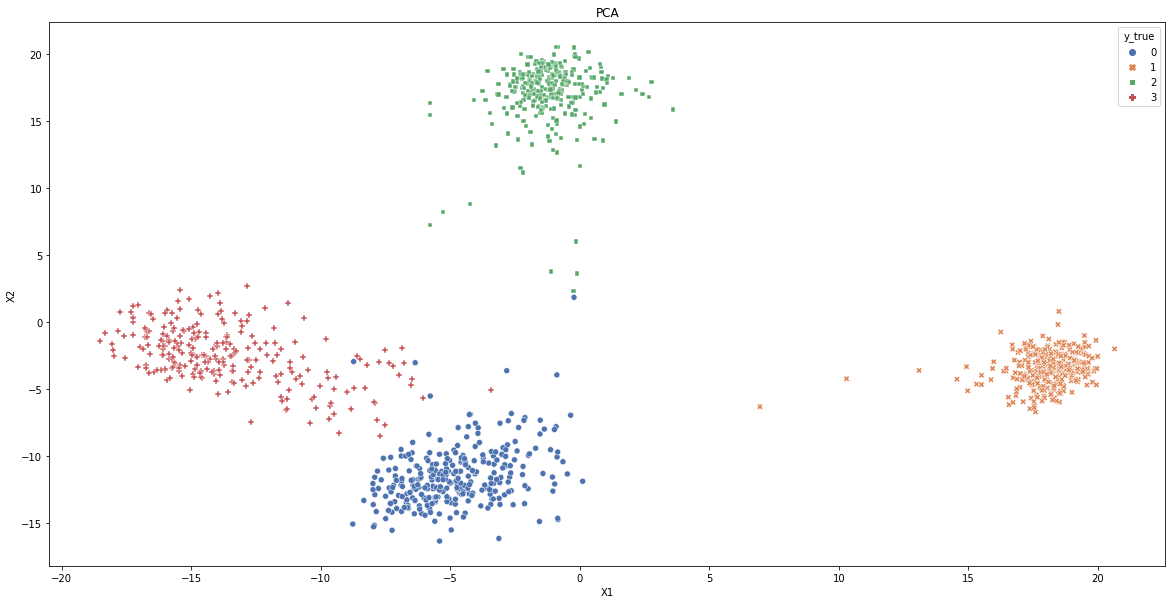

df shape: (1157, 3)


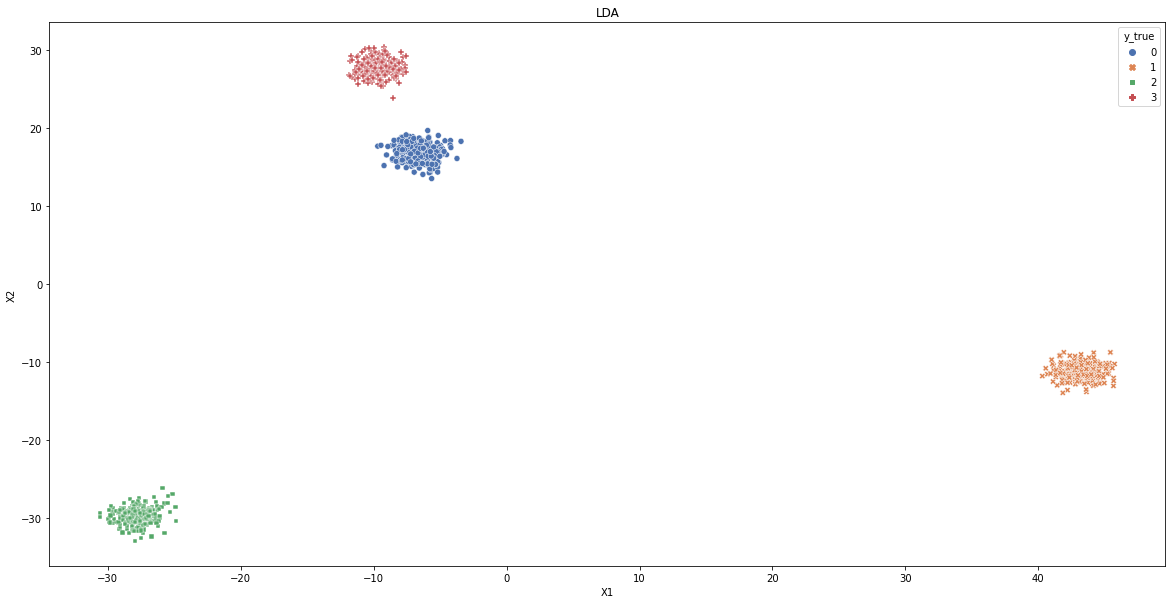

(1157, 512)


In [7]:
from data_preprocessing import loadNumpy
from utils import show_dimension_reduction

user_names = ["jhyoo", "jhoh", "jhongyoo", "kschoi"]

emb = loadNumpy('data', 'extracted_org','face_emb.npy')
lb = loadNumpy('data', 'extracted_org', 'face_lb.npy')

print(f'shape: {emb.shape} {lb.shape}')

show_dimension_reduction(emb, lb, isLDA=False)
show_dimension_reduction(emb, lb, isLDA=True)

print(emb.shape)
num = len(lb[lb==0])//2

fit: (1008, 512), (1008,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


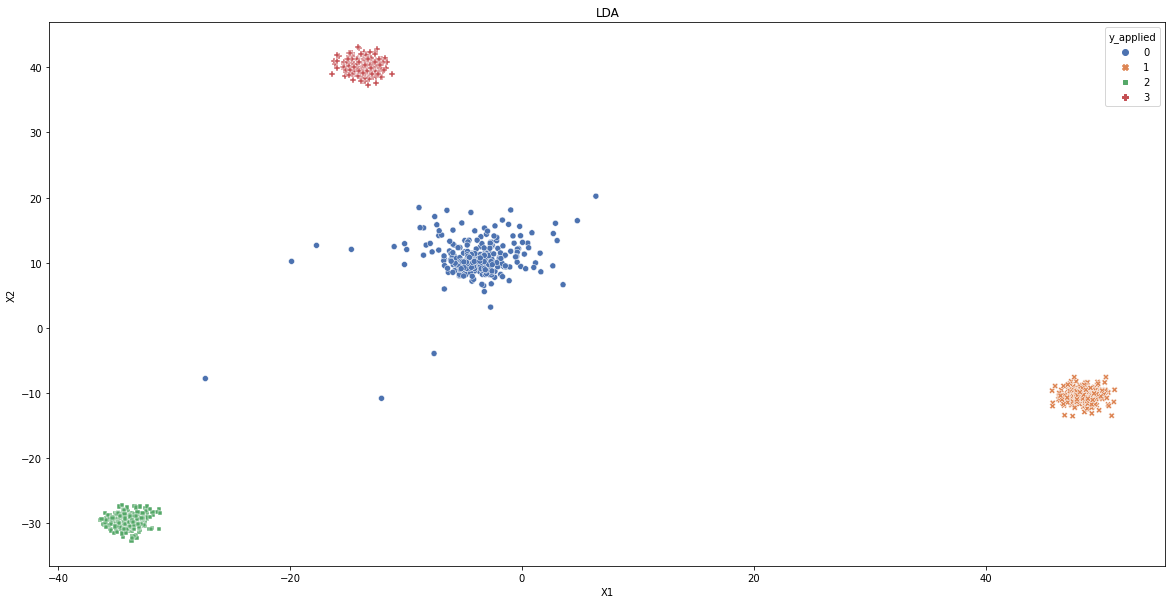

In [8]:
import numpy as np
num = len(lb[lb==0])//2
emb_ = emb[num:, :]
lb_ = lb[num:]

from utils import show_dimension_reduction_lda

show_dimension_reduction_lda(emb_, lb_, emb, lb)


X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


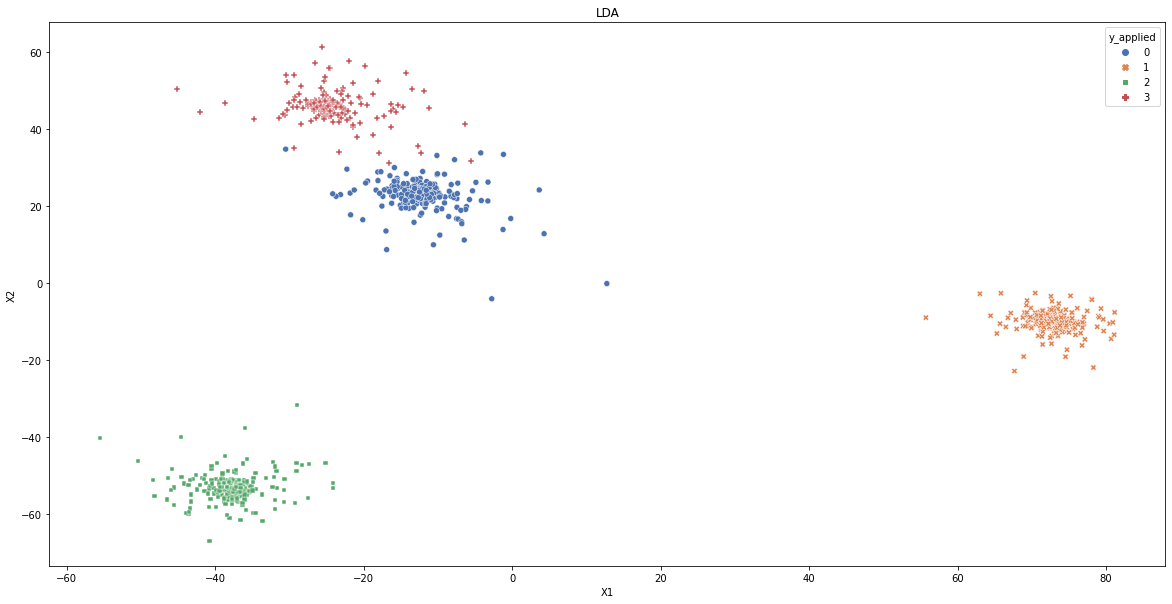

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


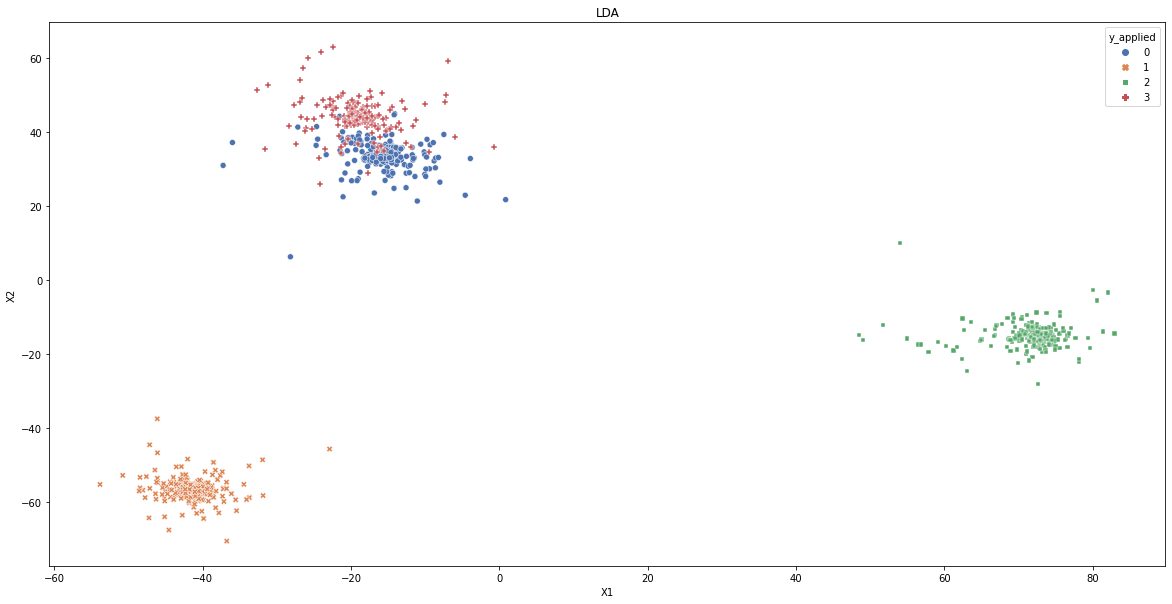

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


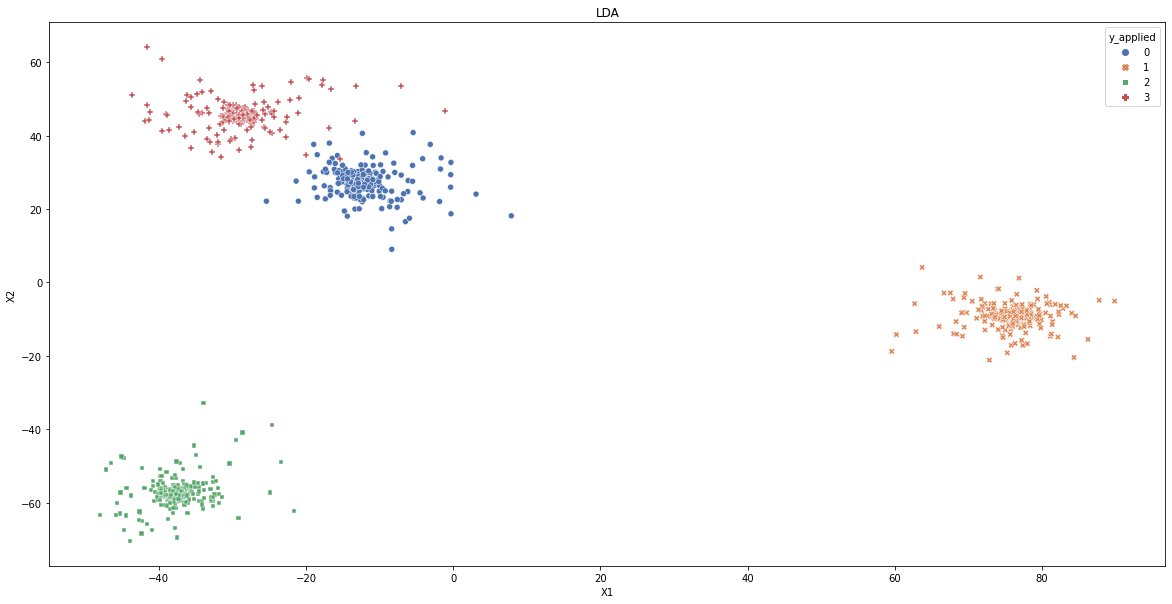

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


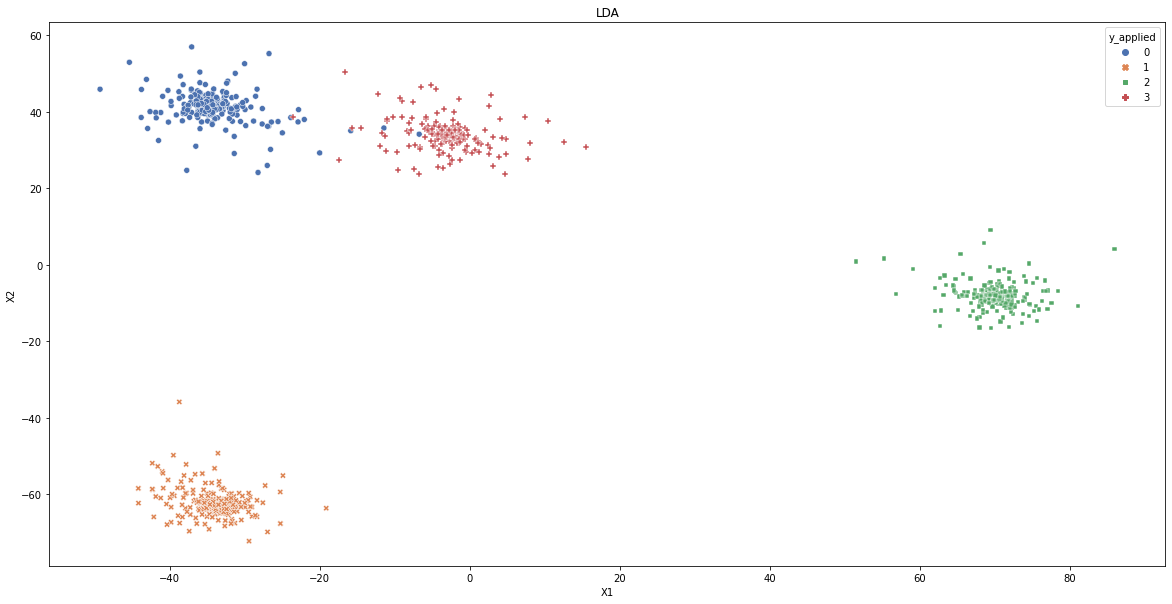

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


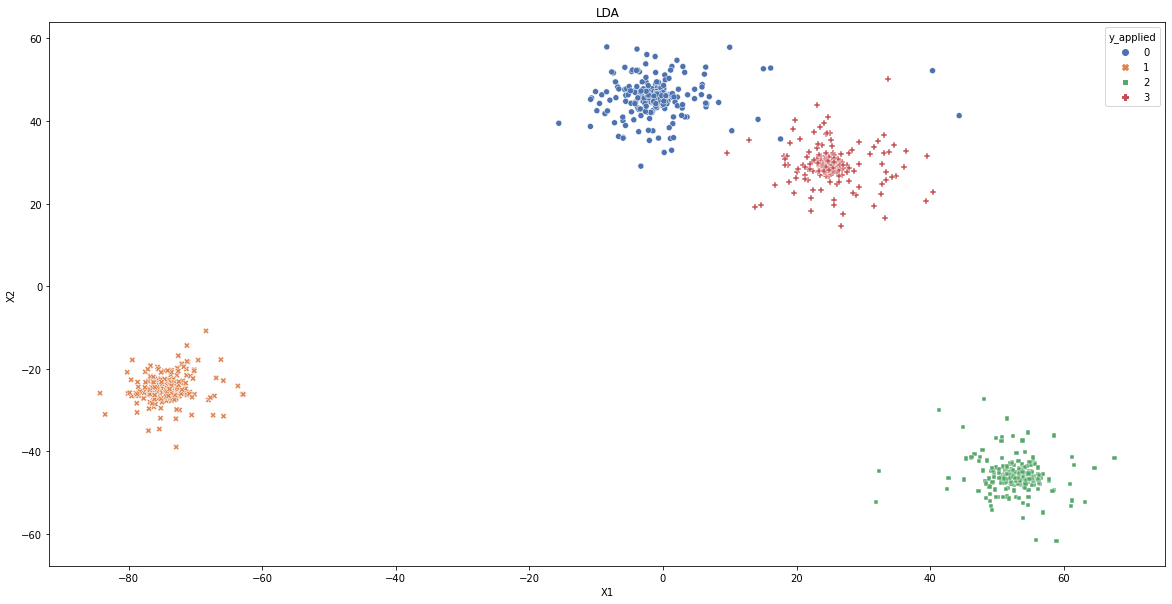

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


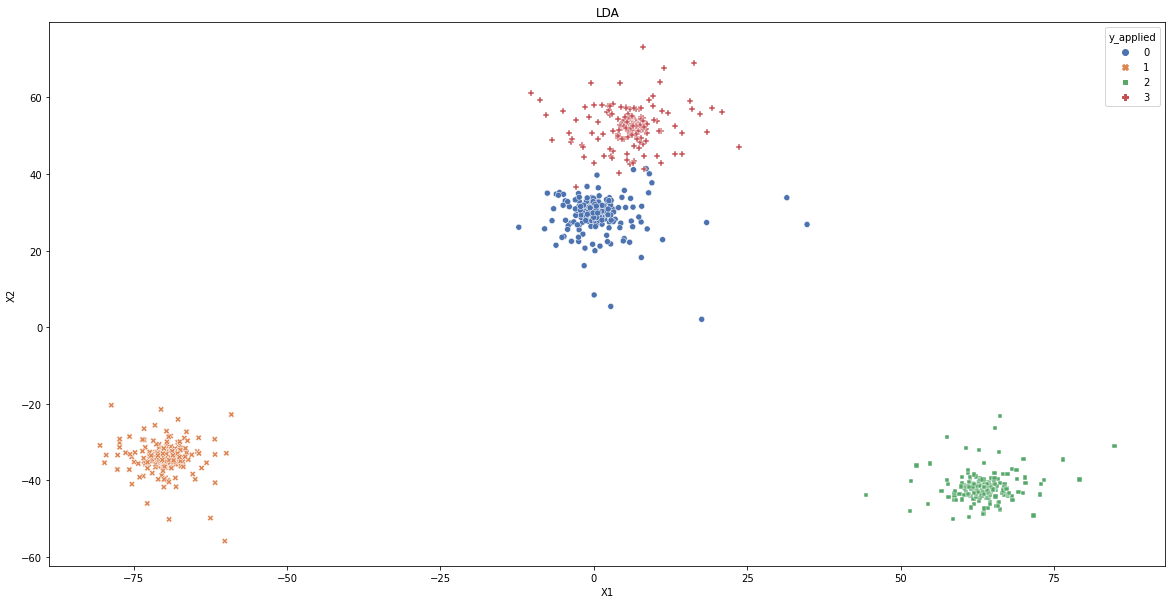

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


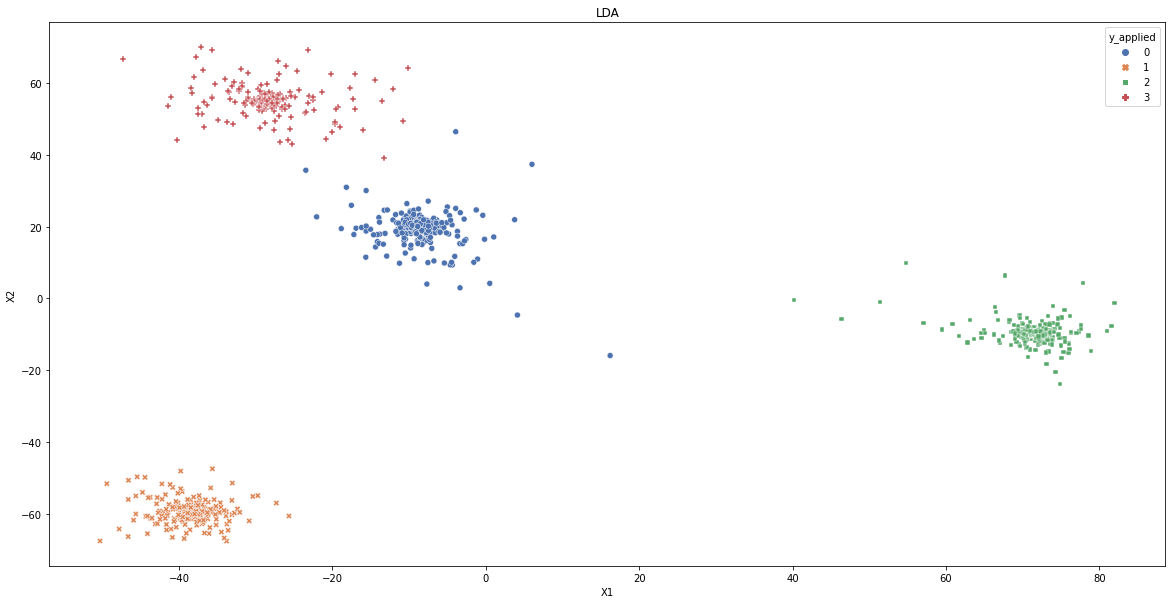

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


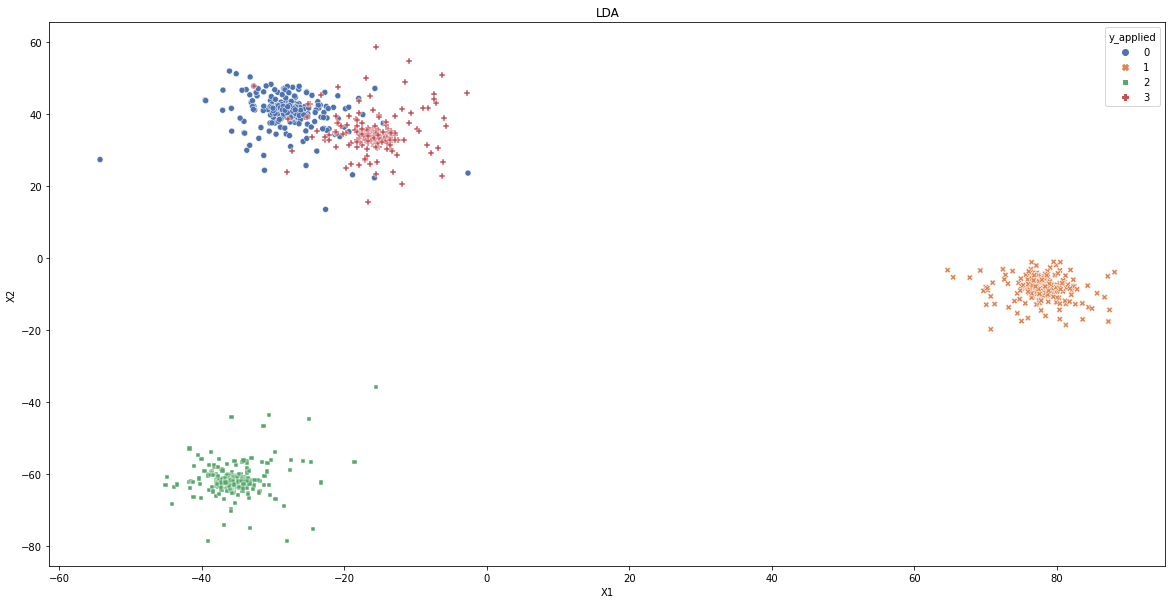

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


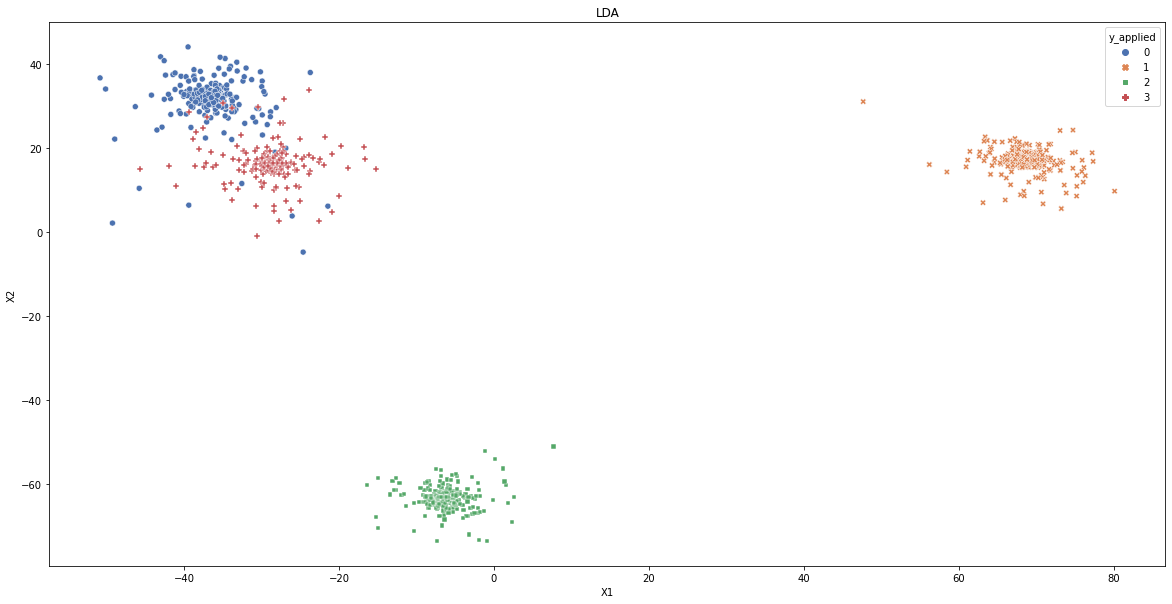

X_res: (1040, 512)
y_res: (1040,)
fit: (1040, 512), (1040,)
applied: (1157, 512), (1157,)
df shape: (1157, 3)


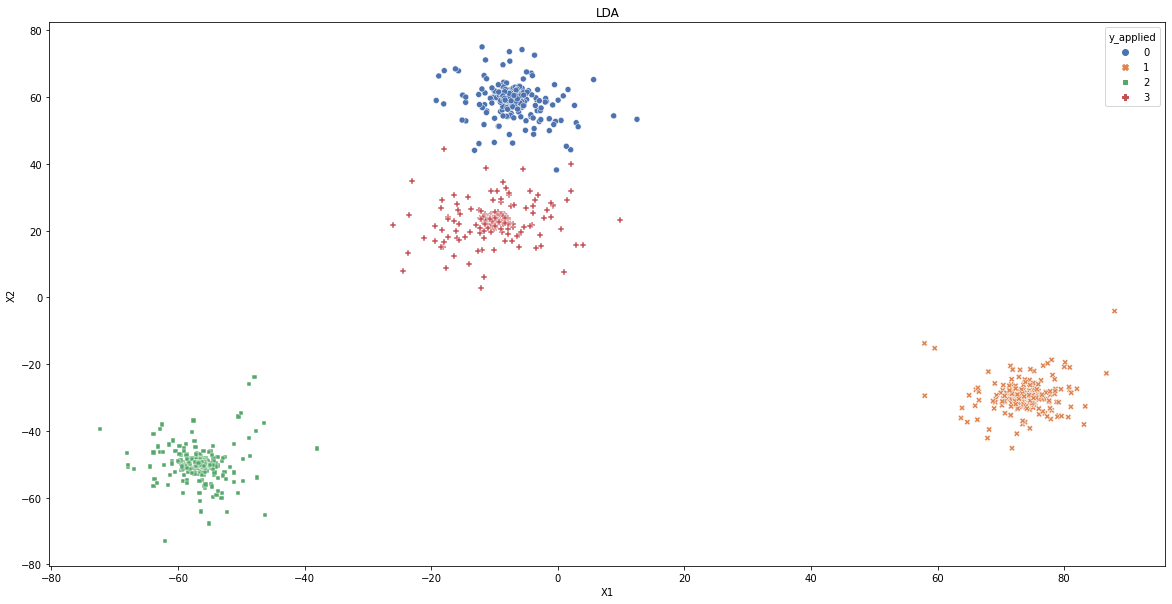

In [42]:
from utils import sampleNumpyForEachLabel

for i in range(10):
    emb__, lb__ = sampleNumpyForEachLabel(emb, lb, 0.9)

    show_dimension_reduction_lda(emb__, lb__, emb, lb)

# Screegraph

x: (1157, 512) projected_x: (1157, 512)


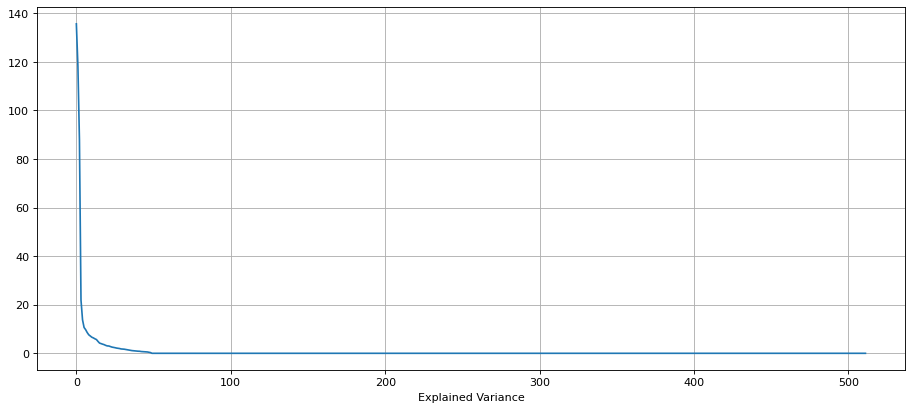

<Figure size 432x288 with 0 Axes>

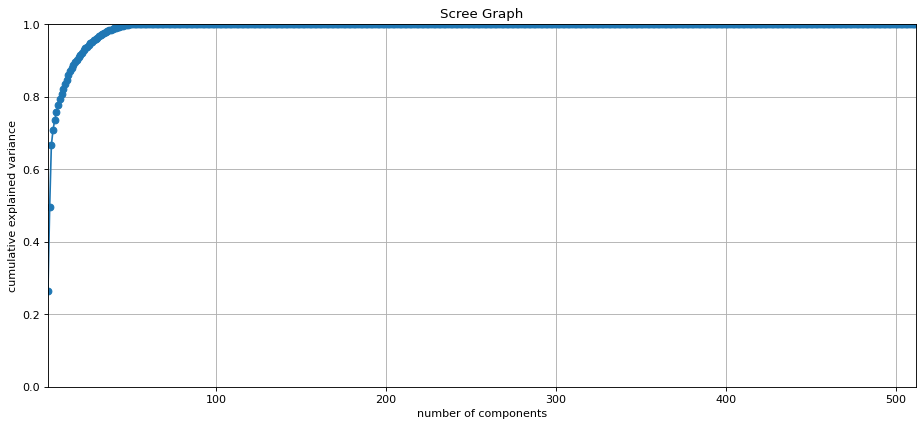

The number of total dimension: 512
The number of dimension to keep 0.8:            8


In [6]:
from utils import show_screegraph

show_screegraph(emb, 512, info_percent=0.8)

x: (1157, 512) projected_x: (1157, 512)


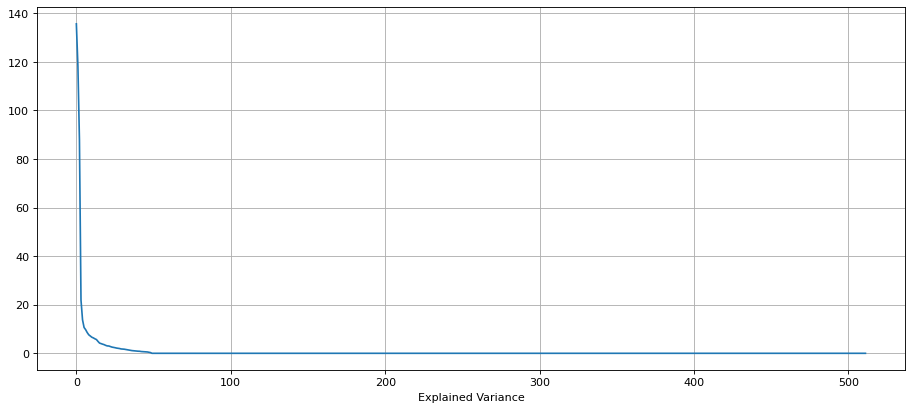

<Figure size 432x288 with 0 Axes>

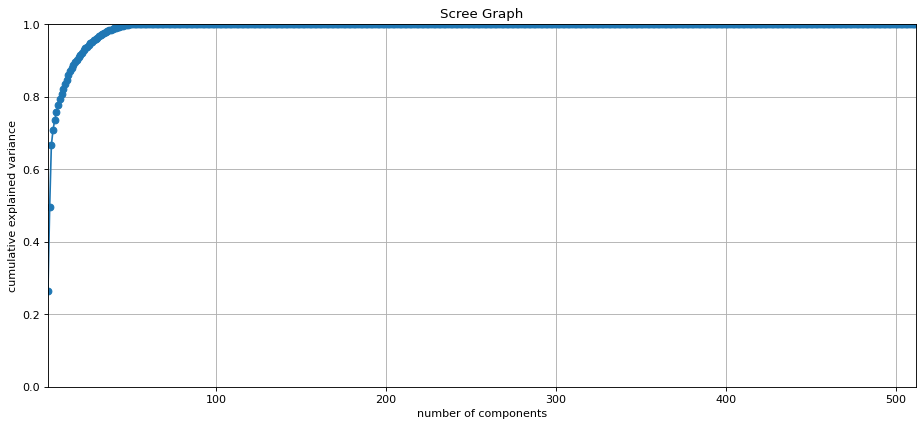

The number of total dimension: 512
The number of dimension to keep 0.95:            26


In [7]:
show_screegraph(emb, 512, info_percent=0.95)

# LDA